In [244]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.utils import normalize
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import seaborn as sn
import cv2 as cv

In [245]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [246]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [247]:
print(X_train.shape)
print(X_train)

(60000, 28, 28)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


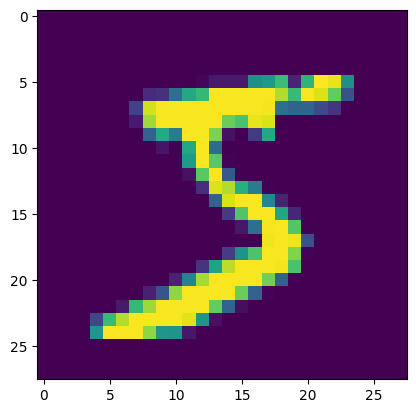

In [248]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [249]:
# Normalize
X_train=X_train/255
X_test=X_test/255

In [250]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [251]:
X_train.shape

(60000, 28, 28)

In [252]:
#resizing img to make it suitable for convolution
IMG_SIZE = 28
X_trainr = np.array(X_train).reshape(-1,IMG_SIZE, IMG_SIZE, 1)
X_testr = np.array(X_test).reshape(-1,IMG_SIZE, IMG_SIZE, 1)
print("Training shape = ", X_trainr.shape)
print("Test shape = ", X_testr.shape)


Training shape =  (60000, 28, 28, 1)
Test shape =  (10000, 28, 28, 1)


In [253]:

# model=Sequential()

# model.add(Flatten(input_shape=(28,28)))
# model.add(Dense(128,activation='relu'))
# model.add(Dense(32,activation='relu'))
# model.add(Dense(10,activation='softmax'))#more than one node use softmax

In [254]:
model_cnn = Sequential()

model_cnn.add(Conv2D(64, (3, 3), activation='relu', input_shape=X_trainr.shape[1:]))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))

model_cnn.add(Conv2D(64, (3, 3), activation='relu', input_shape=X_trainr.shape[1:]))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))

model_cnn.add(Conv2D(64, (3, 3), activation='relu', input_shape=X_trainr.shape[1:]))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))

model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(32, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))



In [255]:
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 1, 1, 64)        

In [256]:
model_cnn.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
#in sparse_categorical_crossentropy one does not need to one hot encode its labels(here labels = 0,1,2,3,4,5,6,7,8,9)

In [257]:
history = model_cnn.fit(X_trainr,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 10s 5ms/step - loss: 0.2598 - accuracy: 0.9195 - val_loss: 0.0826 - val_accuracy: 0.9742
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0858 - accuracy: 0.9736 - val_loss: 0.0791 - val_accuracy: 0.9771
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0596 - accuracy: 0.9816 - val_loss: 0.0767 - val_accuracy: 0.9764
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.0648 - val_accuracy: 0.9828
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0391 - accuracy: 0.9876 - val_loss: 0.0554 - val_accuracy: 0.9844
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0311 - accuracy: 0.9906 - val_loss: 0.0560 - val_accuracy: 0.9847
Epoch 7/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0247 - accuracy: 0.9923 - val_loss: 0.0528 - val_accuracy

In [258]:
#save mode
# model_cnn.save('handwritten_model')

In [259]:
#load model
# model_cnn = keras.models.load_model('handwritten_model')

In [260]:
#Evaluate
test_loss, test_accuracy = model_cnn.evaluate(X_testr,y_test)
print("Loss =", test_loss)
print("accuracy=", test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0504 - accuracy: 0.9871
Loss = 0.05044349282979965
accuracy= 0.9871000051498413


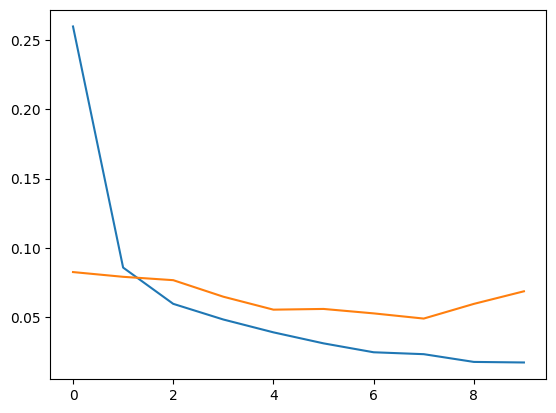

In [261]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

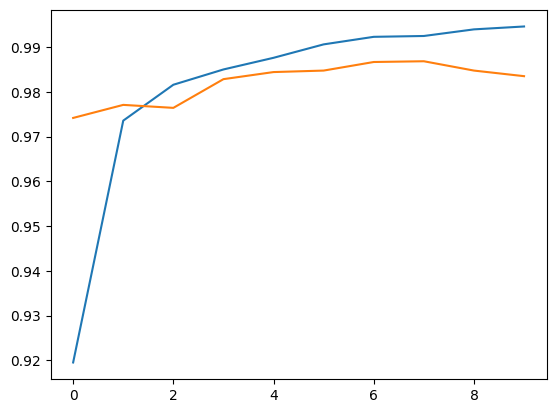

In [262]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

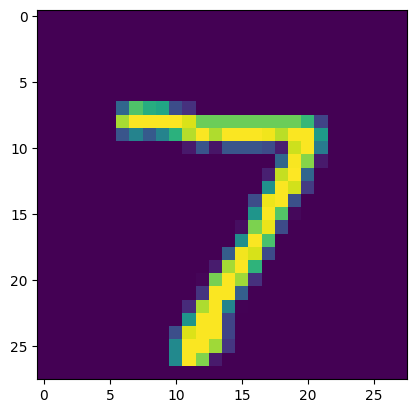

In [263]:
plt.imshow(X_test[0])

In [264]:
prediction = model_cnn.predict([X_testr])


313/313 [==============================] - 1s 2ms/step


In [265]:
prediction[:5]
# print(np.argmax(prediction[0]))

array([[1.91685209e-13, 1.04152186e-07, 9.50457263e-07, 3.35961055e-08,
        2.11498730e-08, 7.45213127e-11, 7.14152007e-16, 9.99998927e-01,
        1.21112687e-09, 3.07719468e-08],
       [4.80652943e-07, 5.70862957e-09, 9.99998212e-01, 2.94406533e-07,
        5.33945261e-08, 7.48654611e-11, 8.92183181e-08, 6.93055654e-07,
        2.23110774e-07, 1.53056439e-11],
       [5.76965340e-06, 9.98185933e-01, 1.51989603e-04, 6.72699662e-06,
        1.01812184e-04, 3.63866166e-05, 8.92919434e-06, 1.08766637e-03,
        4.10267879e-04, 4.53403709e-06],
       [9.99998808e-01, 1.27812871e-10, 7.97814437e-09, 1.08818243e-09,
        4.15618961e-09, 3.78520637e-09, 1.68293028e-07, 3.22012944e-10,
        1.35618103e-08, 1.03798129e-06],
       [6.07612502e-11, 5.75032123e-12, 5.05797140e-12, 8.13427660e-18,
        1.00000000e+00, 2.79540795e-13, 1.15695627e-10, 2.07128672e-12,
        7.57078578e-09, 9.00040986e-10]], dtype=float32)

In [266]:
predicted_labels = [np.argmax(i) for i in prediction]

In [267]:
predicted_labels[:5]

[7, 2, 1, 0, 4]

In [268]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [269]:
cm = tensorflow.math.confusion_matrix(labels=y_test, predictions=predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

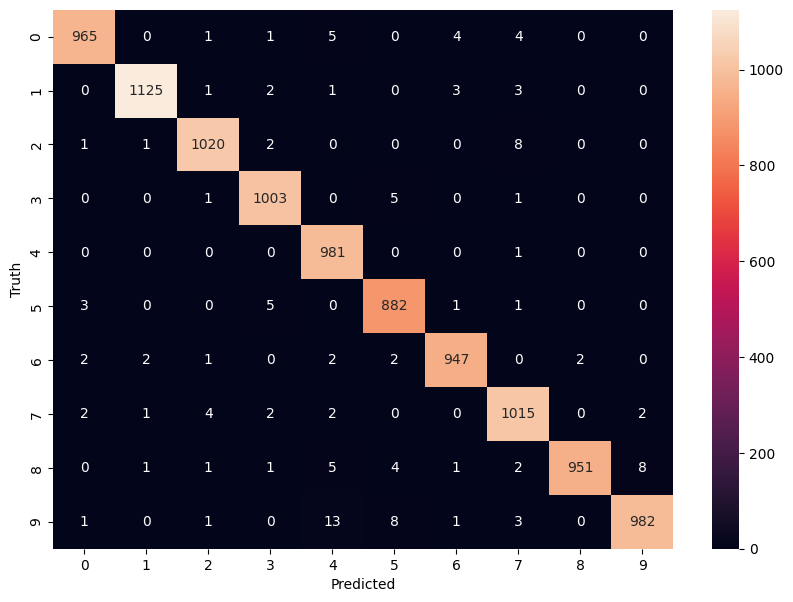

In [270]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot= True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [271]:
def predict_img(input_img):
  gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
  gray = np.invert(np.array(gray))

  resized = cv.resize(gray, (28,28), interpolation = cv.INTER_AREA)
  scaler = MinMaxScaler()
  scaler.fit(resized)
  normalized_img = scaler.transform(resized)
  newImg = np.array(normalized_img).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
  return(np.argmax(model_cnn.predict(newImg)))


1/1 [==============================] - 0s 114ms/step
Prediction - 5


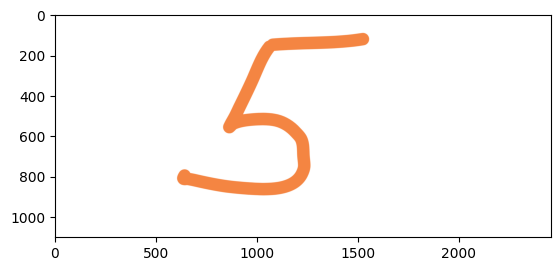

In [272]:
#take user input
img = cv.imread('input.png')
plt.imshow(img)
print("Prediction -", predict_img(img))
